# Домашнее задание 6

(прислать до 04:00 23.10.2018)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 
Если возникает ошибка, то я сообщаю Вам об этом и жду исправленного решения, которое будет удовлетворять указанному требованию.

In [3]:
import joblib
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import pprint as pp
import scipy as sp
import seaborn as sns
import tqdm
import gc
gc.enable()

%matplotlib notebook

## Задача 1
В этой задаче Вам предлагается выяснить, как можно ускорить сходимость градиентного спуска.

- Рассмотрите задачу минимизации дифференцируемой функции $f(x): X \to \mathbb{R}$ и напишите для неё шаг градиентного спуска

- Пусть задано некоторое невырожденое линейное преобразование $P^{1/2}: X \to Y$. По сути $X \equiv Y$, однако для удобства различения этих двух пространств они обозначены разными буквами.

Перенесём решение исходной задачи из пространства $X$ в пространство $Y$ с помощью вспомогательной функции 
$$
g(y) = f(P^{-1/2}y) = f(x)
$$

- Запишите шаг градиентного спуска в переменных $y$ и найдите выражение для $g'(y)$ через переменные $x$.

- Инвариантен ли градиент при линейном преобразовании?

- Преобразуйте выражение для шага градиентного спуска в пространстве $Y$ так, чтобы в нём фигурировали только исходные координаты, то есть отобразите его обратно в пространство $X$

- Исследуйте сходимость градиентного спуска для задачи 
$$
\min e^{x_1 + 3x_2 - 0.1} + e^{-x_1 - 0.1} + e^{x_1 - 3x_2 - 0.1},
$$
используя преобразования координат
$$
P_1 =
\begin{bmatrix}
3 & 0\\
0 & 10
\end{bmatrix}
\quad
P_2 =
\begin{bmatrix}
10 & 0\\
0 & 3
\end{bmatrix}
$$
Параметры функции поиска шага и начальную точку выберите самостоятельно.
Постройте график сходимости аналогичный тем, что были показаны на семинаре для каждого преобразования. Достаточно рисовать норму градиента. Какое преобразование привело к ускорению сходимости и почему? Обратите внимание на оформление графика: подписи к осям должны быть читаемы, линии различимы, где нужно логарифмический масштаб должен быть использован...

- Что такое предобуславливатели (preconditioner) для систем линейных уравнений? 
Какая цель в их использовании и какие предобуславливатели Вы знаете? 
Сравните предобуславливатели с приведённой выше техникой ускорения сходимости. 
Что их объединяет? 

**Решение:**
* $ x_{k+1} = x_{k} - \alpha_k \nabla f(x_k) $ — шаг градиентного спуска.
* Запишем шаг градиентного спуска в новых координатах, пользуясь правилом дифф-я сложной ф-ции: 
$$ 
\nabla g(y) = P^{-1/2} \nabla f(P^{-1/2}y) = P^{-1/2} \nabla f(x)\\
y_{k+1} = y_k - \alpha_k P^{-1/2} \nabla g(y_k) 
$$
* Перейдём в исходные координаты:
$$ 
P^{1/2} x_{k+1} = P^{1/2} x_k - \widetilde{\alpha_k} P^{-1/2} \nabla f(x_k)\\
x_{k+1} = x_k - \widetilde{\alpha_k} P^{-1} \nabla f(x_k)
$$
  Видим, что градиент не инвариантен при линейном преобразовании.

1. Определим основные функции и визуализируем их:

In [2]:
def f(x):
    assert x.size == 2
    x1, x2 = x
    return math.exp(x1 + 3 * x2 - 0.1) \
        + math.exp(-x1 - 0.1) \
        + math.exp(x1 - 3 * x2 - 0.1)


def grad_f(x):
    assert x.size == 2
    x1, x2 = x
    return np.asarray(
        [math.exp(x1 + 3 * x2 - 0.1)
            - math.exp(-x1 - 0.1)
            + math.exp(x1 - 3 * x2 - 0.1),
         3 * math.exp(x1 + 3 * x2 - 0.1)
            - 3 * math.exp(x1 - 3 * x2 - 0.1)]
    )


def contout_plot_2D(f, start, end, step, title):
    sns.set(font_scale=1.3)
    vf = np.vectorize(f, signature="(n)->()")
    X = np.arange(start, end + step, step)
    Y = np.arange(start, end + step, step)
    fig, ax = plt.subplots(1, 1, figsize=(9, 5))
    fvalues = vf(
        np.stack(np.mgrid[start:end+step:step, start:end+step:step], axis=-1))
    ax.set_title(title)
    ax.pcolormesh(X, Y, fvalues, cmap='viridis', alpha=0.7)
    CS = ax.contour(X, Y, fvalues)
    ax.clabel(CS, CS.levels, inline=True)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.axhline(0, color="black", alpha=0.2)
    ax.axvline(0, color="black", alpha=0.2)
    plt.show()

<IPython.core.display.Javascript object>


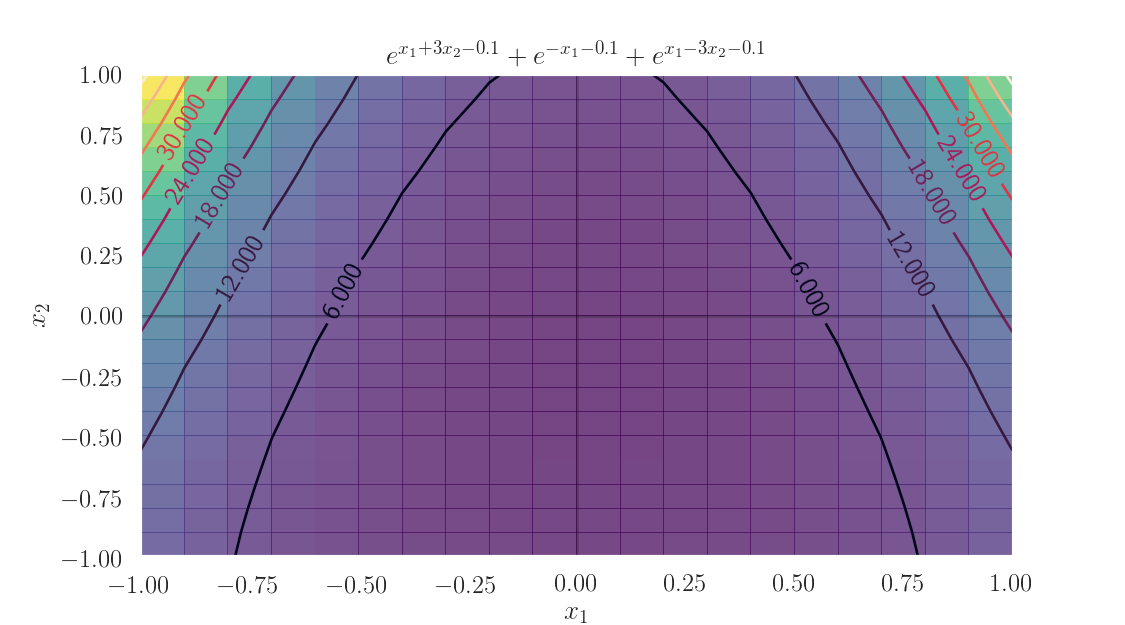

In [14]:
contout_plot_2D(
    f, start=-1, end=1, step=0.1,
    title="$e^{x_1 + 3x_2 - 0.1} + e^{-x_1 - 0.1} + e^{x_1 - 3x_2 - 0.1}$"
)

<IPython.core.display.Javascript object>


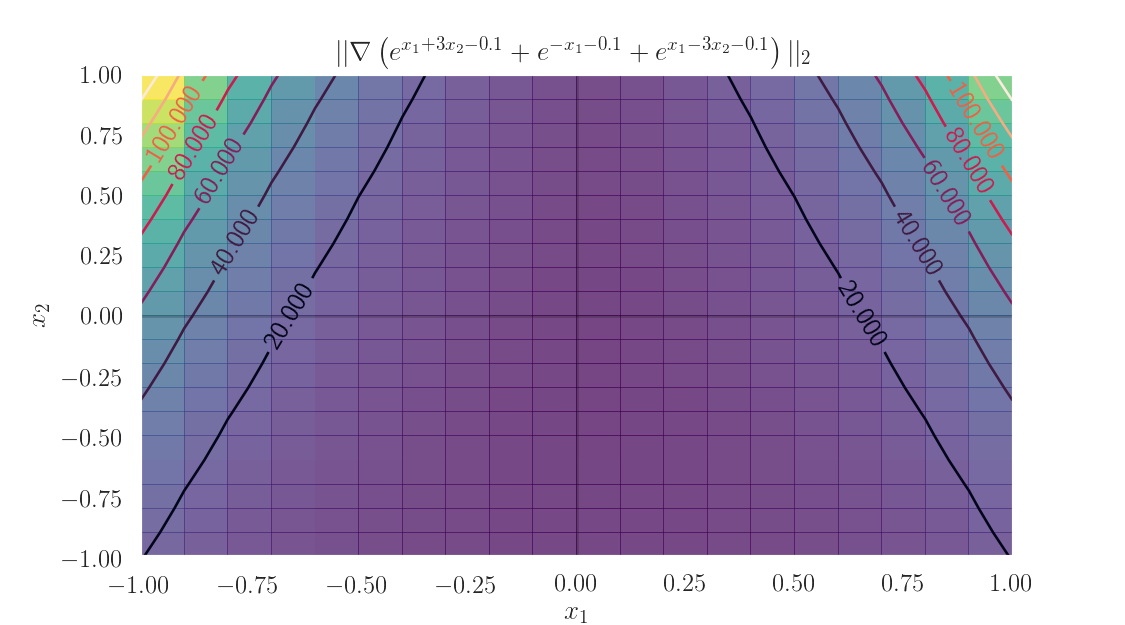

In [15]:
contout_plot_2D(
    f=lambda x: np.linalg.norm(grad_f(x)), start=-1, end=1, step=0.1,
    title=r"$|| \nabla \left(e^{x_1 + 3x_2 - 0.1} + e^{-x_1 - 0.1} + e^{x_1 - 3x_2 - 0.1}\right) ||_2$"
)

Теперь можно сделать неутешительный вывод, что и сама функция, и норма её градиента экспоненциально растут, в связи с чем хорошей сходимости ожидать не приходится: как минимум, задача численно неустойчивая.  
Реализуем градиентный спуск и функции для оценки скорости его сходимости. Начальную точку помогает выбрать здравый смысл: поскольку за отклонение от нуля по $x_2$-координате в обе стороны огромный штраф в виде слагаемого с $ e^{\pm 3 x_{2}} $, логично искать минимум на оси $ x_{2} = 0 $. Потом можно заметить, что за отклонение от нуля по $x_1$-компоненте тоже полагается экспоненциальный штраф, но меньший, причём за отклонение в положительную сторону наказывают немного сильнее. Следовательно, минимум стоит искать в интервале $(-\delta, 0)$ для не очень больших $\delta$.

In [4]:
def line_search_fixed_seq(x, gradient, num_iter, **kwargs):
    return 1 / (np.linalg.norm(gradient) * math.sqrt(num_iter + 1))


def gradient_descent(f, grad_f, x0, epsilon, num_iter, line_search,
                     verbose=False, callback=None,
                     grad_norm_plot=False, step_size_plot=False,
                     preconditioner=None, **kwargs):
    x = x0.copy()
    iteration = 0
    opt_arg = {"f": f, "grad_f": grad_f}
    grad_norms = []
    step_sizes = []
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        gradient = grad_f(x)
        if grad_norm_plot:
            grad_norms.append(np.linalg.norm(gradient))
        alpha = line_search(x, gradient, iteration, **opt_arg)
        if step_size_plot:
            step_sizes.append(alpha * np.linalg.norm(gradient))
        if preconditioner is not None:
            x = x - alpha * np.ravel(np.linalg.inv(preconditioner) @ gradient)
        else:
            x = x - alpha * gradient
        if callback is not None:
            callback(x)
        iteration += 1
        if verbose:
            print("{}: function val = {}".format(iteration, f(x)))
            print("{}: gradient norm = {}".format(
                iteration, np.linalg.norm(gradient)))
        if np.linalg.norm(gradient) < epsilon:
            break
        if iteration >= num_iter:
            break
    res = {"x": x, "f(x)": f(x), "num_iter": iteration,
           "tol": np.linalg.norm(grad_f(x))}
    if grad_norm_plot:
        sns.set(font_scale=1.3)
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.set_title(
            "Norm of objective function gradient from iteration to iteration, " 
            "starting point = ({})"
            .format(', '.join(
                [str(coord) for coord in np.ravel(x0)]
            ))
        )
        ax.set_xlabel("iterations")
        ax.set_ylabel(r"$|| \nabla f(x) ||_{2}$")
        ax.semilogy(np.arange(len(grad_norms)), grad_norms)
        plt.show()
    if step_size_plot:
        sns.set(font_scale=1.3)
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.set_title(
            "Step size from iteration to iteration"
            "starting point = ({})"
                .format(', '.join(
                    [str(coord) for coord in np.ravel(x0)]
                ))
        )
        ax.set_xlabel("iterations")
        ax.set_ylabel(r"$\alpha_k || \nabla f(x) ||_{2}$")
        ax.semilogy(np.arange(len(step_sizes)), step_sizes)
        plt.show()
    return res

Preconditioner matrix:
 [[1. 0.]
 [0. 1.]]


<IPython.core.display.Javascript object>


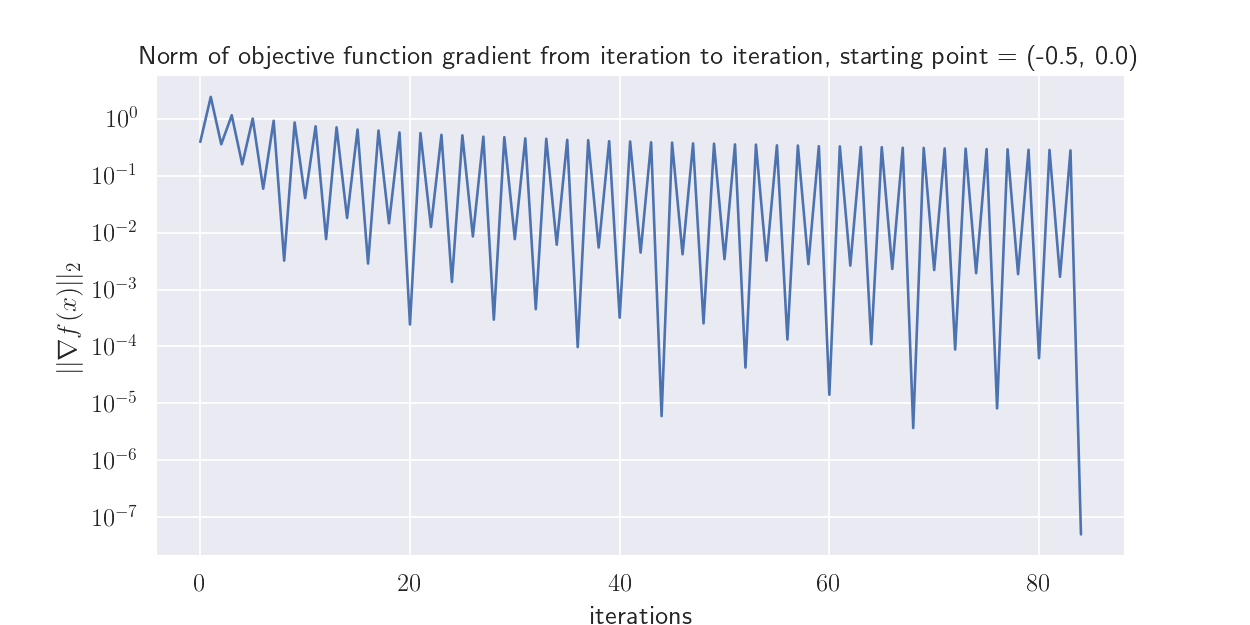

Preconditioner matrix:
 [[ 3  0]
 [ 0 10]]


<IPython.core.display.Javascript object>


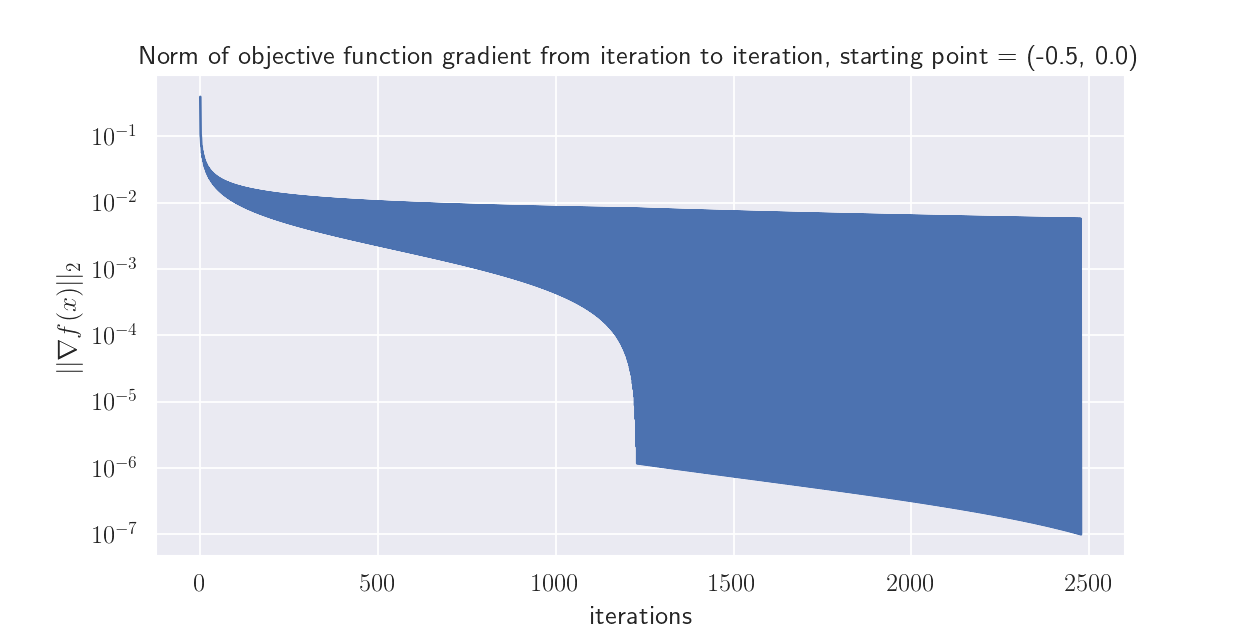

Preconditioner matrix:
 [[10  0]
 [ 0  3]]


<IPython.core.display.Javascript object>


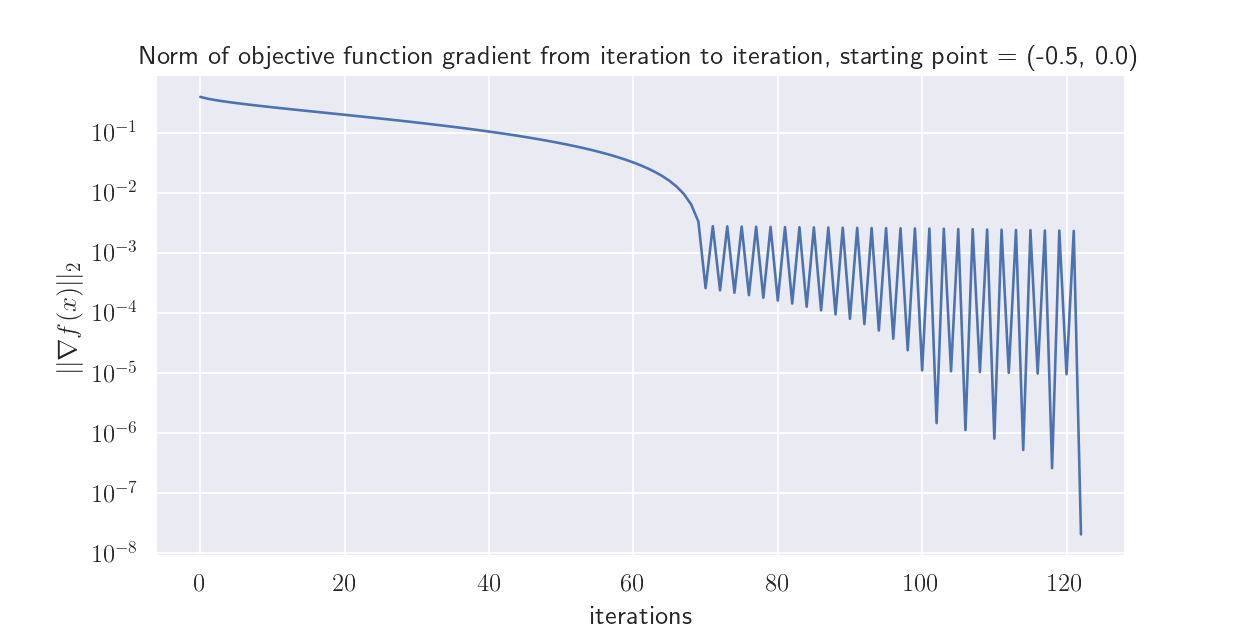

In [25]:
preconditioners = [
    np.diag(np.ones(2)),
    np.diag([3, 10]),
    np.diag([10, 3])
]

for P in preconditioners:
    print("Preconditioner matrix:\n", P)
    gradient_descent(
        f,
        grad_f,
        x0=np.asarray([-0.5, 0]),
        epsilon=1e-7,
        num_iter=100000,
        line_search=line_search_fixed_seq,
        verbose=False,
        grad_norm_plot=True,
        preconditioner=P@P)

Тем не менее, по графику функции заметно, что скорость сходимости **сильно** зависит от начального положения. Значит, сделать какие-то выводы можно только сделав перебор по сетке, одна точка не отражает реального положения вещей.

In [7]:
""" На моём ноутбуке считается полторы минуты """

convergence_count = np.zeros(3)
num_iter = 10000
lo, hi, step = -1, 1, 0.1
grid = np.mgrid[lo:hi+step:step, lo:hi+step:step].reshape(2, -1).T


def process_x0(x0):
    converged_at_x0 = np.zeros(len(preconditioners))
    for i, P in enumerate(preconditioners):
        res = gradient_descent(
            f, grad_f,
            x0=x0,
            epsilon=1e-7,
            num_iter=num_iter,
            line_search=line_search_fixed_seq,
            preconditioner=P@P,
            verbose=False
        )
        converged_at_x0[i] = res["num_iter"] < num_iter
    return converged_at_x0


convergence_count = np.sum(
    joblib.Parallel(n_jobs=8)(
        joblib.delayed(process_x0)(x0)
        for x0 in tqdm.tqdm_notebook(grid)
    ), axis=0
)

In [8]:
print("Initial poins for which the descent converged in less than {} iteraions:\n".format(num_iter)
      + "W/o preconditioning: {:.0f}\ndiag(3, 10): {:.0f}\ndiag(10, 3): {:.0f}".format(*convergence_count))

Initial poins for which the descent converged in less than 10000 iteraions:
W/o preconditioning: 21
diag(3, 10): 175
diag(10, 3): 270


**Выводы:** 
Видим, что замена координат приводит к существенному ускорению сходимости, если смотреть на ситуацию более глобально. Попробуем разобраться в причинах: $ P_{1} $ и $ P_{2} $ растягивают пространство вдоль осей: точки, расположенные близко в исходном пр-ве $ X $, оказываются на удалении друг от друга в новом пр-ве $Y$. Следовательно, большим прыжкам градиентного спуска в пр-ве $Y$ соответствуют маленькие шажки в пр-ве $X$. Вспомним, как выглядит целевая функция: даже малое отклонение от текущего положения приводит к взрывному изменению как её значения, так и нормы её градиента. Исказить координатную сетку предложенным образом — разумная и практически "бесплатная" с точки зрения изменения вычислительной сложности алгоритма идея. Поиск по сетке показывает, что такой подход существенно влияет на скорость сходимости достаточно часто, чтобы быть практически полезным. $P_2$ показывает лучшие результаты, чем $P_1$, т.к. отклонение от нуля по $x_2$-координате существенно сильнее изменяет значение функции, потому по этой координате образы точек лучше развести подальше.

---
Preconditioner в контексте СЛАУ — невырожденное линейное преобразование, которое улучшает характеристики системы. В данном случае стремятся уменьшить *condition number* — меру численной неустойчивости решений. Системы с малым condition number более устойчивы к шуму в данных и ошибкам, вызванным ограниченной точностью машинной арифметики. На англоязычной Википедии хорошо объясняется intuition behind: "As a rule of thumb, if the condition number $ \kappa (A)=10^{k} $, then you may lose up to $ k $ digits of accuracy on top of what would be lost to the numerical method due to loss of precision from arithmetic methods."  
На практике:
* Righ preconditioning: $$ Ax = b \to AP^{-1}Px = b \sim \begin{cases} AP^{-1}y = b, \\ Px = y \end{cases} $$  
* Left preconditioning: $$ Ax = b \to P^{-1}(Ax - b) = 0 $$  

Чем ниже число обусловленности преобразованной системы, тем лучше, но в разумных пределах. При $ P=A $ оно минимально и равно 1, но решать такую систему не проще, чем исходную. Разновидностей метода много, но геометрически их суть более-менее ясна: preconditioning can be viewed as changing the geometry of the vector space with the goal to make the level sets look like circles." Видно, что в случае градиентного спуска смысл тот же.

## Задача 2

- Покажите, что градиенты, полученные на двух последовательных шагах градиентного спуска с использованием правила наискорейшего спуска, ортогональны.
- Докажите, что если целевая функция $f(x) = \frac{1}{2}x^{\top}Qx - b^{\top}x$, $Q \in \mathbb{S}^n_{++}$, шаг определяется с помощью наискорейшего спуска и $x^0 - x^*$ параллелен собственному вектору матрицу $Q$, то градиентный спуск сходится за один шаг. Покажите, что для $f(x) = x^{\top}x$ градиентный спуск с выбором шага по правилу наискорейшего спуска сходится за одну итерацию (с использованием предыдущего утверждения и прямым вычислением). 

Напомним основные определения:

**Правило наискорейшего спуска**: на каждом шаге градиентного спуска верно, что 
$ \alpha_{k} = \arg\min\limits_{\alpha} f(x_{k} - \alpha \nabla f(x_{k})) $

* **Утверждение:** $ \forall k: \nabla f(x_k) \perp \nabla f(x_{k+1}) $  
  **Доказательство:** Утверждение ясно из геометрических соображений: антиградиент задаёт *направление* наискорейшего убывания целевой функции, потому если $ \nabla f(x_{k} - \alpha_k \nabla f(x_{k})) \not \perp \nabla f(x_{k}) $, то рассмотрим $ \mbox{proj}_{\nabla f(x_{k})} \nabla f(x_{k+1}) $ и получим, что перемещением вдоль этого направления можно добиться дальнейшего уменьшения $f(x)$, *что противоречит выбору $\alpha_k$* (получается, что константа $ \alpha_k + \frac{\mbox{proj}_{\nabla f(x_{k})} \nabla f(x_{k+1})}{\lVert \nabla f(x_{k}) \rVert} $ оптимальнее).  
  Приведём теперь его формальное обоснование:
  $$ 
      \alpha_{k} := \arg\min\limits_{\alpha} g(\alpha) [:= f(x_k - \alpha \nabla f(x_k))] \implies g'(\alpha_k) = \nabla f(x_{k+1})^{\top} \nabla f(x_k) = 0\\ 
  $$
* **Утверждение:** Если целевая функция — $f(x) = \frac{1}{2}x^{\top}Qx - b^{\top}x$, $Q \in \mathbb{S}^n_{++}$, шаг определяется с помощью наискорейшего спуска и $x^0 - x^*$ параллелен собственному вектору матрицу $Q$, то градиентный спуск сходится за один шаг. Для $f(x) = x^{\top}x$ градиентный спуск с выбором шага по правилу наискорейшего спуска сходится за одну итерацию (показать с использованием первой части и прямым вычислением).  
  **Доказательство:**
  
  $ Q \in S^{n}_{++} \implies \det Q > 0 \implies \exists! x_{*} \in \arg\min\limits_{x} f(x): \nabla f(x_{*}) = 0 $, где $\nabla f(x) = Qx - b\\$, откуда $ x_{*} = Q^{-1}b $. Т.е. аналитическое решение лежит на поверхности. Теперь посмотрим, как в данном случае будет работать градиентный спуск:
$$  
    \arg\min\limits_{\alpha} \left[ f(x_{k} - \alpha \nabla f(x_{k})) = \arg\min\limits_{\alpha} \frac{1}{2} (x_{k} - \alpha \nabla f(x_{k}))^{\top}Q(x_{k} - \alpha \nabla f(x_{k})) - b^{\top}(x_{k} - \alpha \nabla f(x_{k})) \right]  =\\
    = \arg\min\limits_{\alpha} \left[\frac{\alpha^2}{2} \nabla f(x_{k})^{\top} Q \nabla f(x_{k}) - \alpha \nabla f(x_{k})^{\top} (Q x_{k} - b) \right]
  $$
  Положим $ g(\alpha) := \frac{\alpha^2}{2} \nabla f(x_{k})^{\top} Q \nabla f(x_{k}) - \alpha \nabla f(x_{k})^{\top} (Q x_{k} - b) $.  
  
  $Q \in S^{n}_{++} \implies g(\alpha) $ — выпуклая по $ \alpha $ функция, минимум которой $ \alpha_{k} $ найдём через условие $ g'(\alpha) = 0 $: 
  $$ 
      \alpha = \nabla f(x_{k})^{\top} (Q x_{k} - b)\\
      \alpha_{k} = \frac{\nabla f(x_{k})^{\top} (Q x_{k} - b)}{\nabla f(x_{k})^{\top} Q \nabla f(x_{k})} 
  $$
  Мы также знаем, что $\nabla f(x) = Qx - b\\$, потому вид $\alpha_k$ можно упростить:
  
  $$ 
      \alpha_{k} = \frac{\nabla f(x_{k})^{\top} \nabla f(x_{k})}{\nabla f(x_{k})^{\top} Q \nabla f(x_{k})} = \frac{1}{R(Q, \nabla f(x_k))}  
  $$
  где $R$ — коэффициент Рэлея.  
  Теперь попробуем доказать, что $ x_{1} = x_{*} $:
  
  $$
      x_{1} = x_{0} - \alpha_{0} \nabla f(x_{0}) = x_{0} - \alpha_{0} (Qx_{0} - b) =\\
      = x_{0} - \alpha_{0} Q (x_{0} - x_{*}) =\\
      = x_{0} - (x_{0} - x_{*}) = x_{*}
  $$
  Последнее равенство следует из того, какой вид принимает $ \alpha_{k} $, если $ x_{0} - x_{*} $ пропорционально с.в. оператора $ Q $ при с.зн. $ \lambda $: $$ \alpha_{0} = \frac{1}{R(Q, x_{0}-x_{*})} = \frac{1}{\lambda} $$
  В случае $ Q = I\ \left(f(x) = \frac{1}{2} x^{\top} x\right) $ и вовсе получаем $ \nabla f(x) \equiv x $ и $ \forall k: \alpha_{k} = 1 $.  
  Тогда видно, что $ x_{1} = x_{*} = 0 $, причём для любой начальной точки $ x_{0} $:
  * С использованием предыдущего пункта: для $ Q = I $ всякий вектор является собственным, потому предыдущее утверждение применимо.
  * Прямым вычислением: $ x_{1} = x_{0} - \nabla f(x_{0}) = x_{0} - x_{0} = 0 $
  

## Задача 3

- Для функции Розенброка $f(x_1, x_2) = 100 (x_2 - x^2_1)^2 + (1 - x_1)^2$ найдите аналитически её минимум и исследуйте зависимость сходимости градиентного спуска от начальных приближений $x^0 = (1.2, 1.2)$ и $x^0 = (-1.2, 1)$. 
Величину шага определяйте только по условию достаточного убывания функции. 
Также постройте график зависимости длины шага от итерации для каждой начальной точки. Какой вывод Вы можете сделать?

Посмотрим для начала, сколько итераций нужно при $ \alpha_k := \frac{1}{ \sqrt{k+1} ||\nabla f(x)||_2} $, как в первой задаче:

<IPython.core.display.Javascript object>


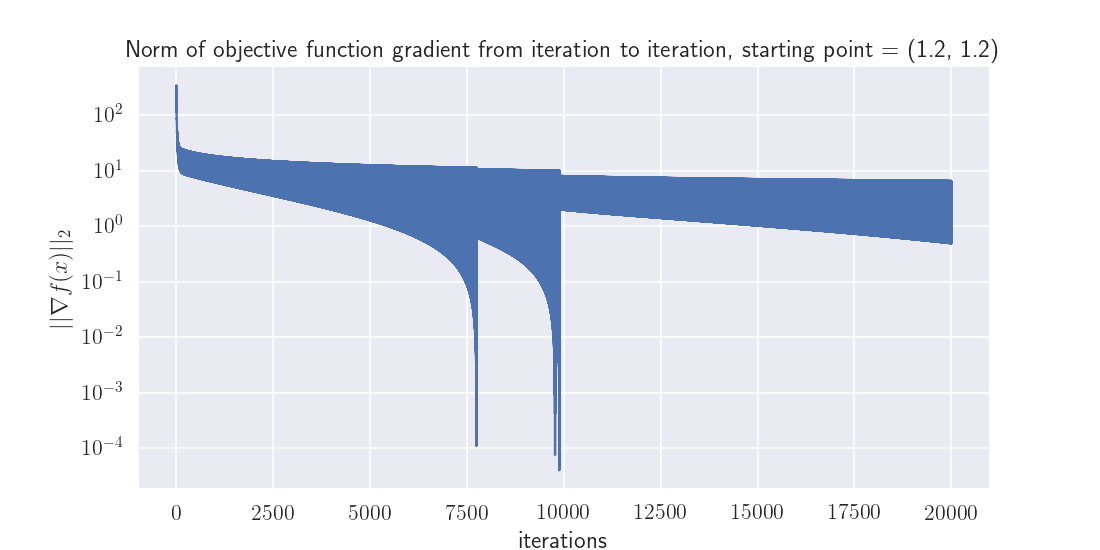

<IPython.core.display.Javascript object>


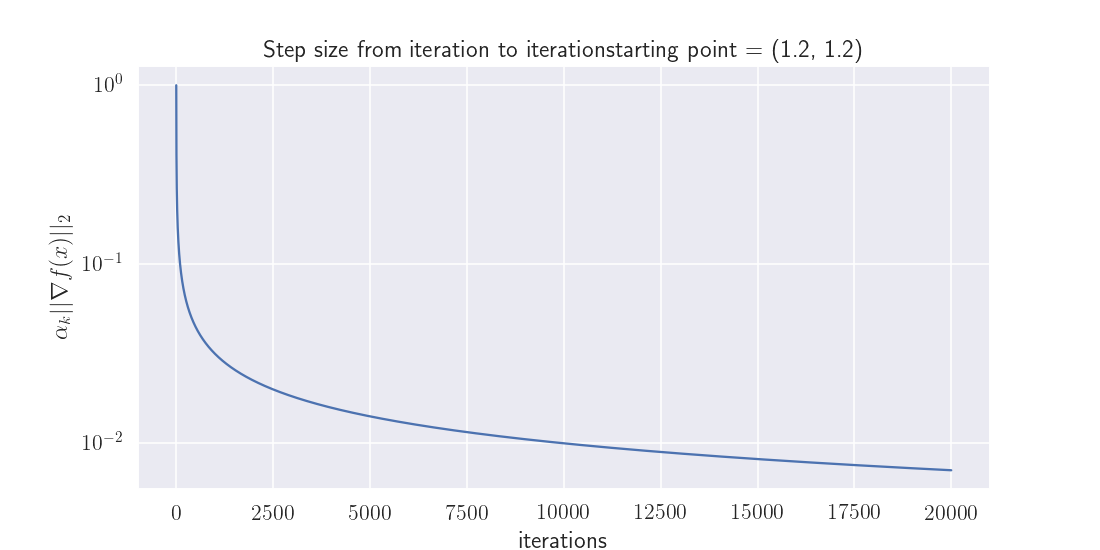

Didn't converge, requires more iterations


<IPython.core.display.Javascript object>


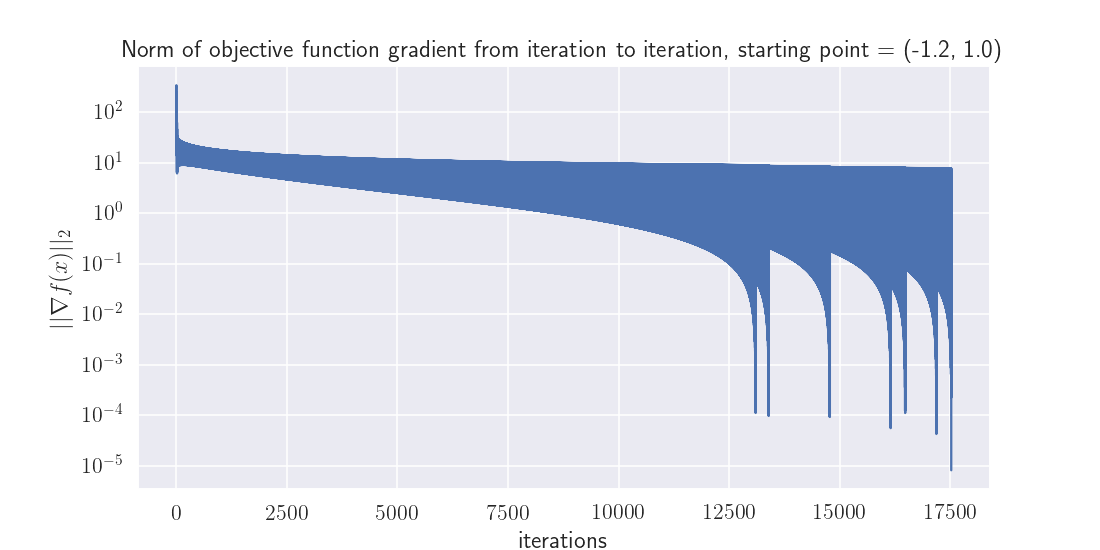

<IPython.core.display.Javascript object>


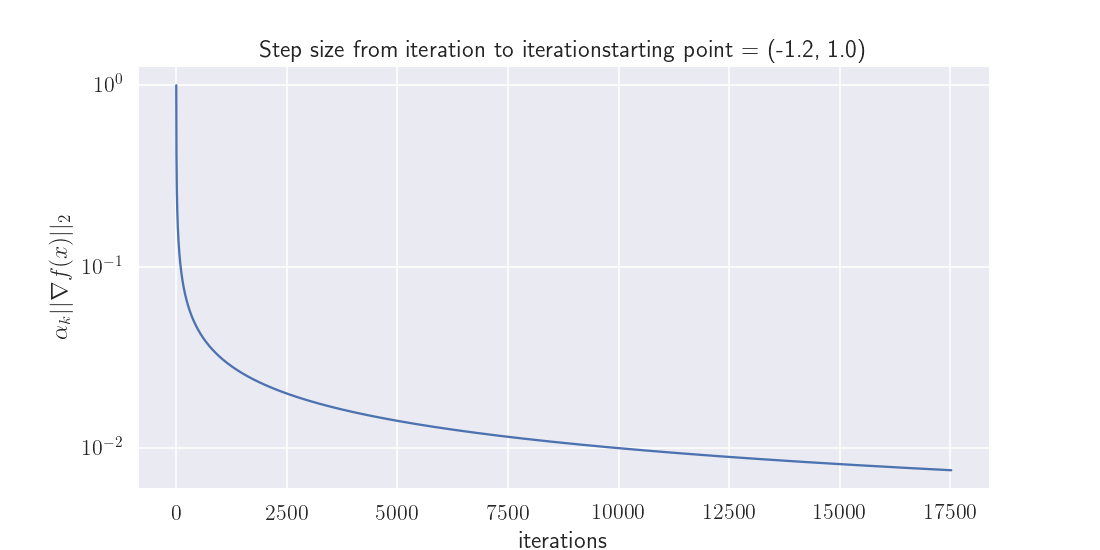

Converged in 17521 steps


In [36]:
starting_points = [np.array(arr) for arr in [[1.2, 1.2], [-1.2, 1]]]
num_iter = 20000
for x0 in starting_points:
    res = gradient_descent(
        f=sp.optimize.rosen,
        grad_f=sp.optimize.rosen_der,
        x0=x0,
        epsilon=1e-5,
        num_iter=num_iter,
        line_search=line_search_fixed_seq,
        grad_norm_plot=True,
        step_size_plot=True
    )
    if res["num_iter"] < num_iter:
        print("Converged in {} steps".format(res["num_iter"]))
    else:
        print("Didn't converge, requires more iterations")

<IPython.core.display.Javascript object>


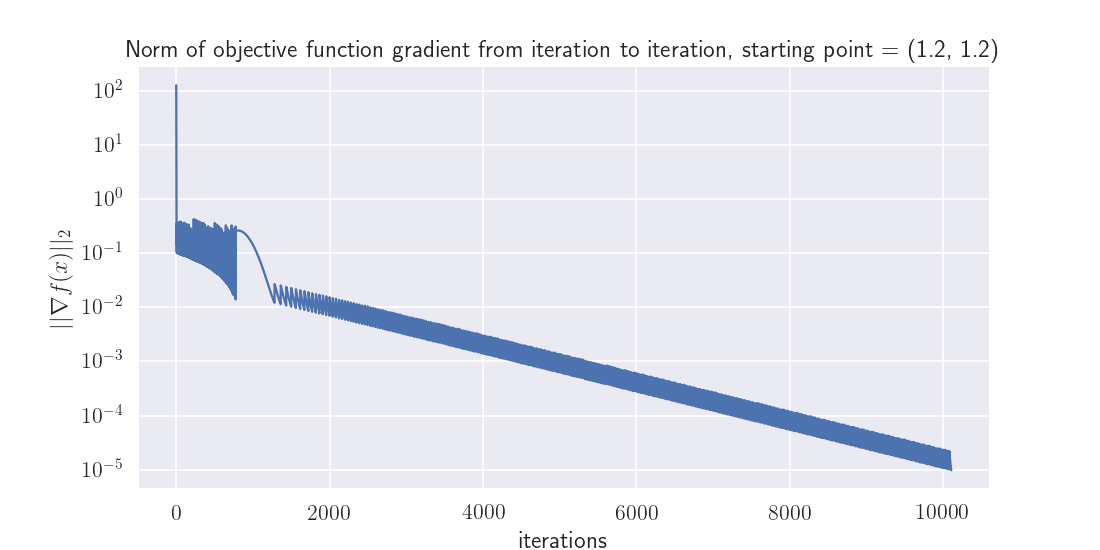

<IPython.core.display.Javascript object>


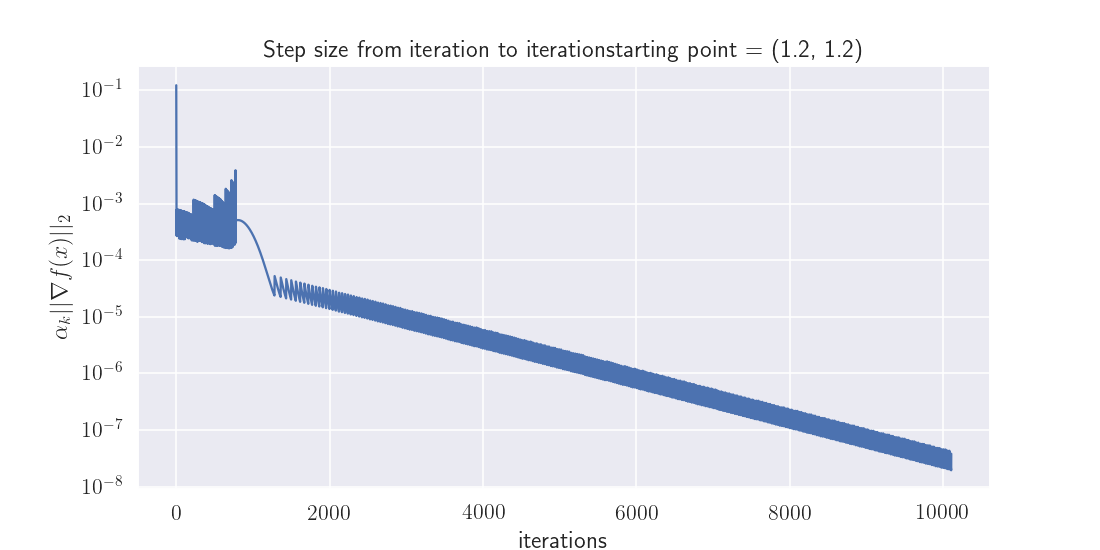

Converged in 10109 steps


<IPython.core.display.Javascript object>


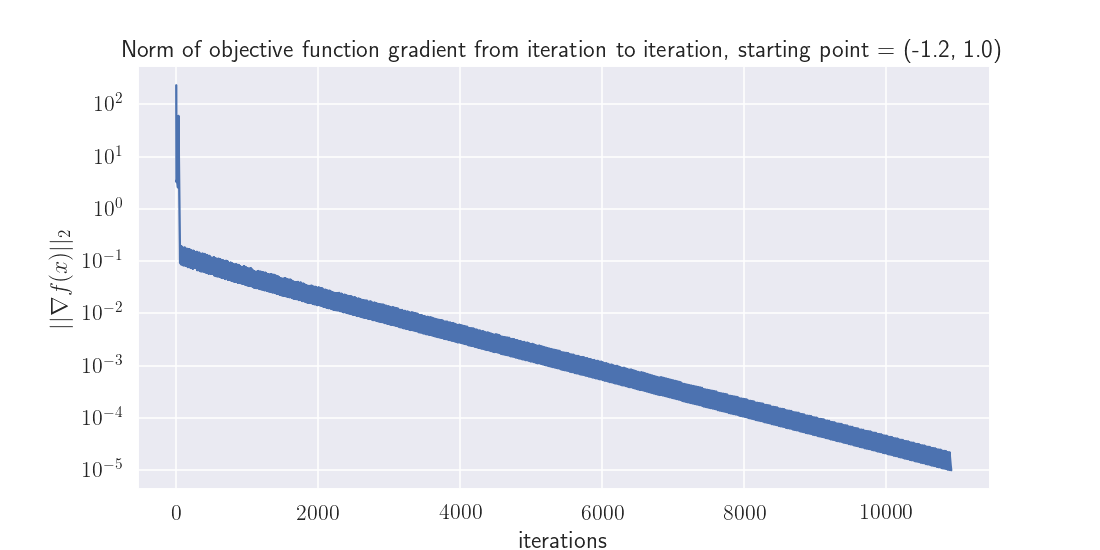

<IPython.core.display.Javascript object>


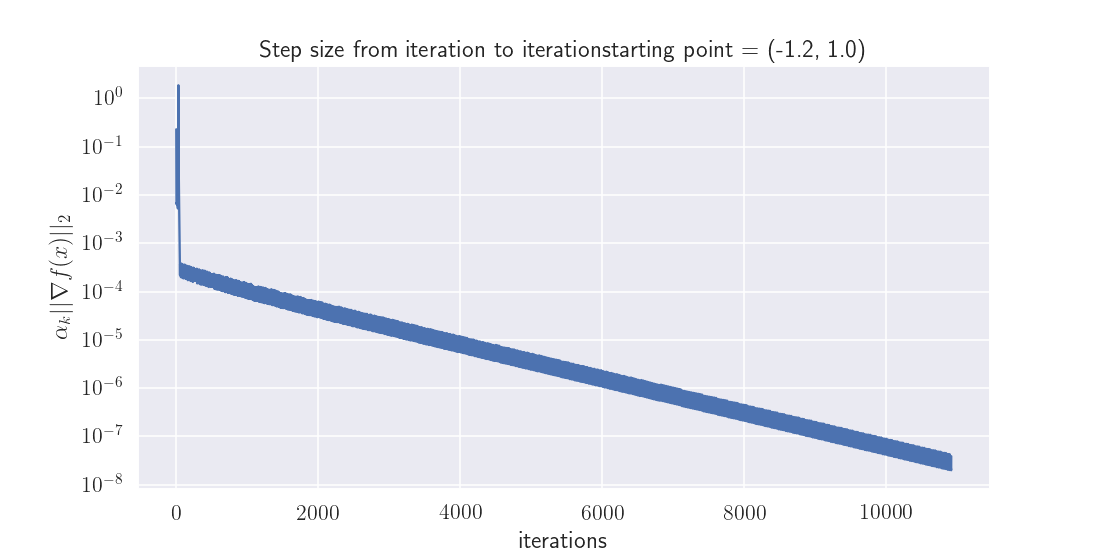

Converged in 10917 steps


In [38]:
def line_search_suff_decr(x, gradient, num_iter, **kwargs):
    beta = 0.015
    alpha = 1
    rho = 0.5
    f = kwargs["f"]
    max_iter = 30
    curr_iter = 0
    while (f(x - alpha * gradient) > f(x) - beta * alpha**2 * np.linalg.norm(gradient)**2
           and curr_iter < max_iter): 
        alpha *= rho
    return alpha

for x0 in starting_points:
    res = gradient_descent(
        f=sp.optimize.rosen,
        grad_f=sp.optimize.rosen_der,
        x0=x0,
        epsilon=1e-5,
        num_iter=num_iter,
        line_search=line_search_suff_decr,
        grad_norm_plot=True,
        step_size_plot=True
    )
    if res["num_iter"] < num_iter:
        print("Converged in {} steps".format(res["num_iter"]))
    else:
        print("Didn't converge, requires more iterations")

**Выводы:** * Минимум функции Розенброка, очевидно, достигается в точке $x_{*} := (1, 1)$. Чуть более разумный метод подбора длины шага существенно повышает скорость сходимости, причём даже для точки, удалённой от реального минимума. Следовательно, нужно сначала проанализировать целевую функцию на предмет хороших свойств и на основании этой информации подобрать подход, это обеспечивает многократный прирост производительности даже на очень плохих функциях, примером которых как раз является функция Розенброка.

- Решите задачу наискорейшим спуском
$$
\frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x
$$
при 
$$
A = 
\begin{bmatrix}
0.78 & −0.02 & −0.12 & −0.14\\
−0.02 & 0.86 & −0.04 & 0.06 \\
−0.12 & −0.04 & 0.72 & −0.08\\
−0.14 & 0.06 & −0.08 & 0.74
\end{bmatrix}
\qquad
b = \begin{bmatrix}
0.76\\
0.08\\
1.12\\
0.68
\end{bmatrix}
$$
и начальной точкой $x^0 = 0$ с точностью нормы градиента $10^{-6}$. Постройте график сходимости, насколько сходимость быстрая? Найдите спектр матрицы $A$ (покажите, как Вы его искали) и сравните полученный график сходимости с графиком сходимости, полученным из теоретических соображений.

In [7]:
A = np.matrix([
    [0.78, -0.02, -0.12, -0.14],
    [-0.02, 0.86, -0.04, 0.06],
    [-0.12, -0.04, 0.72, -0.08],
    [-0.14, 0.06, -0.08, 0.74]
])
b = np.array([0.76, 0.08, 1.12, 0.68]).reshape(-1, 1)
eigvals = np.linalg.eigvals(A)  # spectrum of A
print("Spectrum: {}\nCondition number: {}".format(
    eigvals, np.max(eigvals) / np.min(eigvals)))

Spectrum: [0.52 0.94 0.88 0.76]
Condition number: 1.8076923076923055


Найдём теоретическое решение и удостоверимся в его правильности, используя `scipy.optimize.minimize`:

In [8]:
def g(x):
    return 0.5 * x.T @ A @ x - b.T @ x


def grad_g(x):
    return A @ x - b


def line_search_steepest(x, gradient, num_iter, **kwargs):
    return np.asscalar((x.T @ x) / (x.T @ A @ x)) if not np.isclose(np.linalg.norm(x), 0) else 1.


theor_sol = np.linalg.inv(A) @ b  # analytical solution
print("Analytical solition: x_min = {}, f(x_min) = {}".format(
    np.ravel(theor_sol),
    np.asscalar(g(theor_sol))
))
scipy_sol = sp.optimize.minimize(
    lambda x: 0.5 * x.T @ A @ x - b.T @ x, x0=np.zeros(4))["x"]
assert np.allclose(np.ravel(theor_sol), scipy_sol)

Analytical solition: x_min = [1.53496503 0.12200957 1.97515642 1.41295547], f(x_min) = -2.174659550975341


<IPython.core.display.Javascript object>


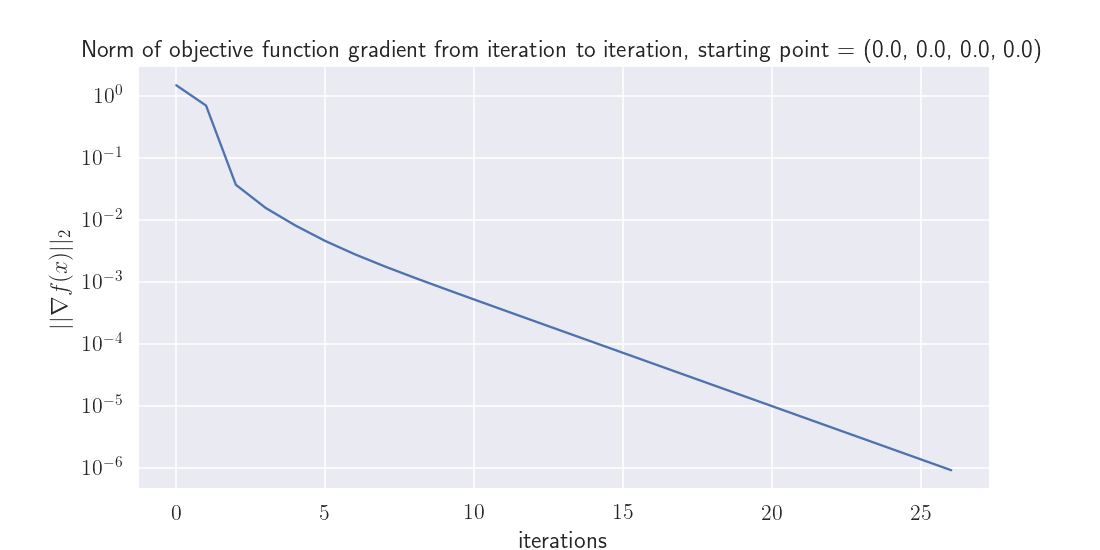

{'f(x)': matrix([[-2.17465955]]),
 'num_iter': 27,
 'tol': 6.292460882992771e-07,
 'x': matrix([[1.53496545],
         [0.12200998],
         [1.97515601],
         [1.41295547]])}

In [9]:
gradient_descent(
    f=g,
    grad_f=grad_g,
    x0=np.zeros(4).reshape(-1, 1),
    epsilon=1e-6,
    num_iter=1000000,
    line_search=line_search_steepest,
    grad_norm_plot=True
)

**Выводы:** Хотя теория предсказывает сходимость за всего одну итерацию, число обусловленности матрицы $A$, которое, хоть и немного, но отклоняется от единицы, делает процесс менее устойчивым численно и замедляет сходимость.